In [225]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import rcParams

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["xtick.labelsize"] = 9

dataset = pd.read_csv('Training_set.csv', sep = ";")
dataset.head()


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [226]:
dataset.nunique()

id                       59400
status_group                 3
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_qu

Text(0.5, 0, 'Number of Waterpumps')

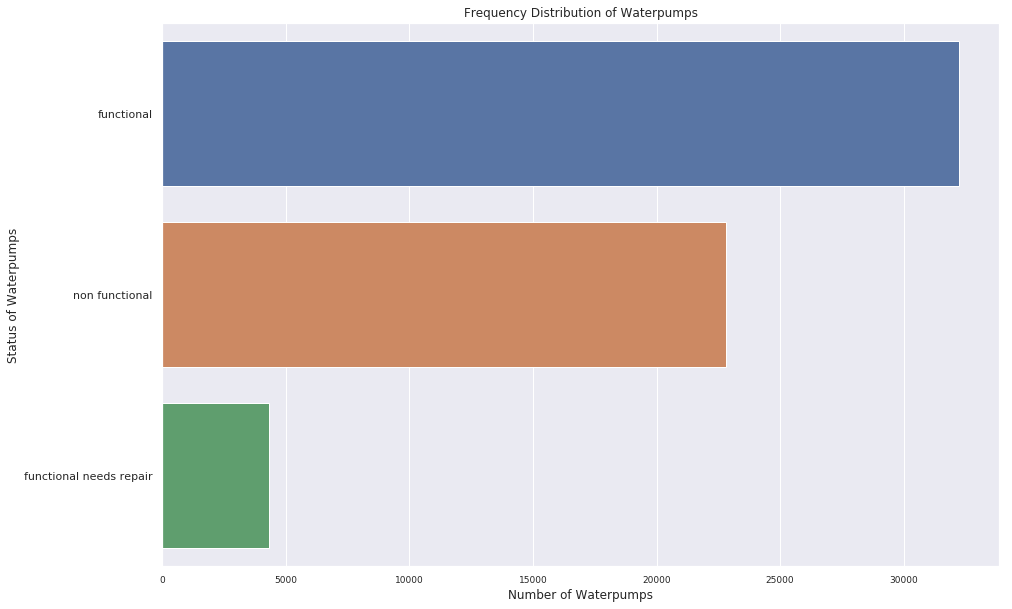

In [227]:
status_group_count = dataset['status_group'].value_counts()
sns.barplot(status_group_count.values, status_group_count.index, orient= 'h')
plt.title('Frequency Distribution of Waterpumps')
plt.ylabel('Status of Waterpumps', fontsize=12)
plt.xlabel('Number of Waterpumps', fontsize=12)

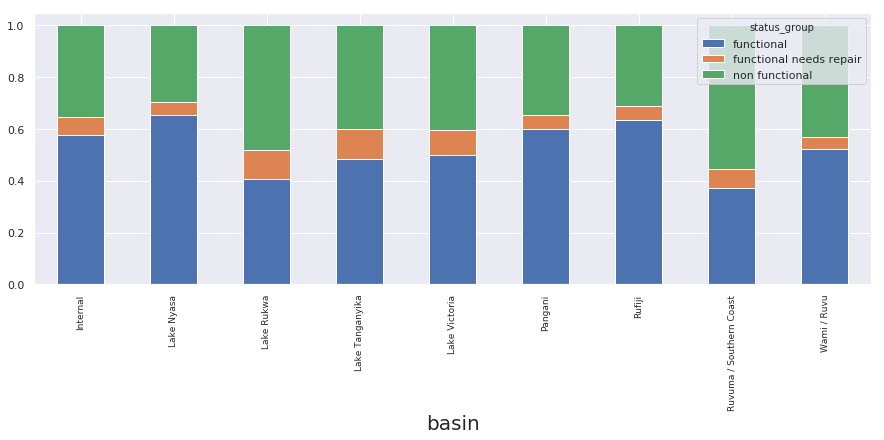

In [229]:
pd.crosstab(dataset.basin, dataset.status_group, normalize="index").plot.bar(stacked=True, figsize=(15,5));

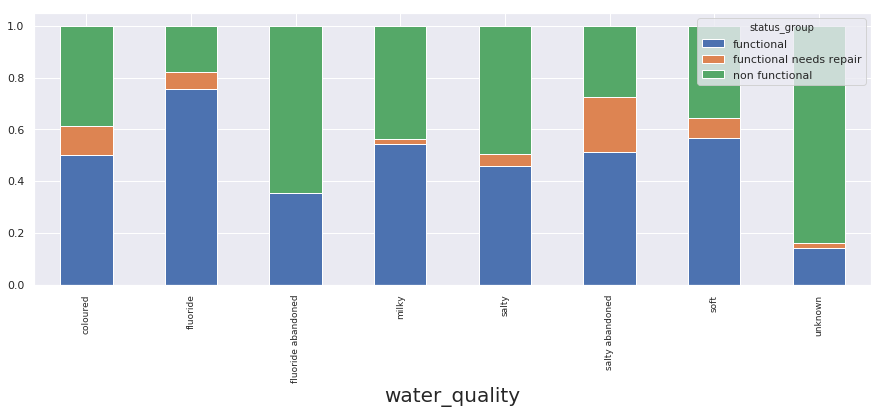

In [230]:
pd.crosstab(dataset.water_quality, dataset.status_group, normalize="index").plot.bar(stacked=True, figsize=(15,5));

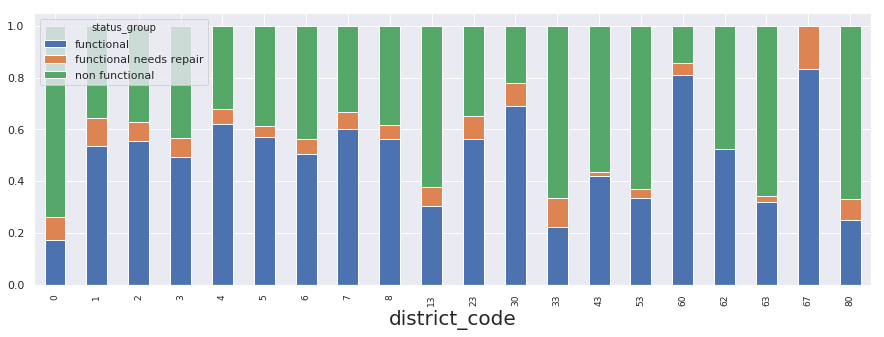

In [231]:
pd.crosstab(dataset.district_code, dataset.status_group, normalize="index").plot.bar(stacked=True, figsize=(15,5));

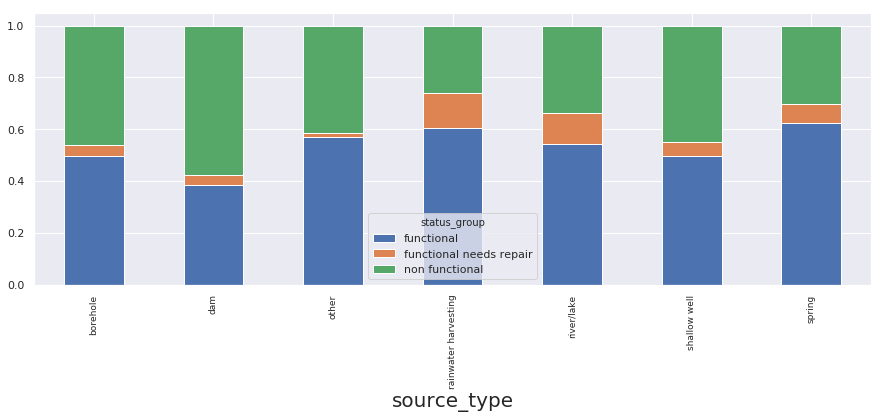

In [232]:
pd.crosstab(dataset.source_type, dataset.status_group, normalize="index").plot.bar(stacked=True, figsize=(15,5))

Text(0.5, 0, 'Extraction Type')

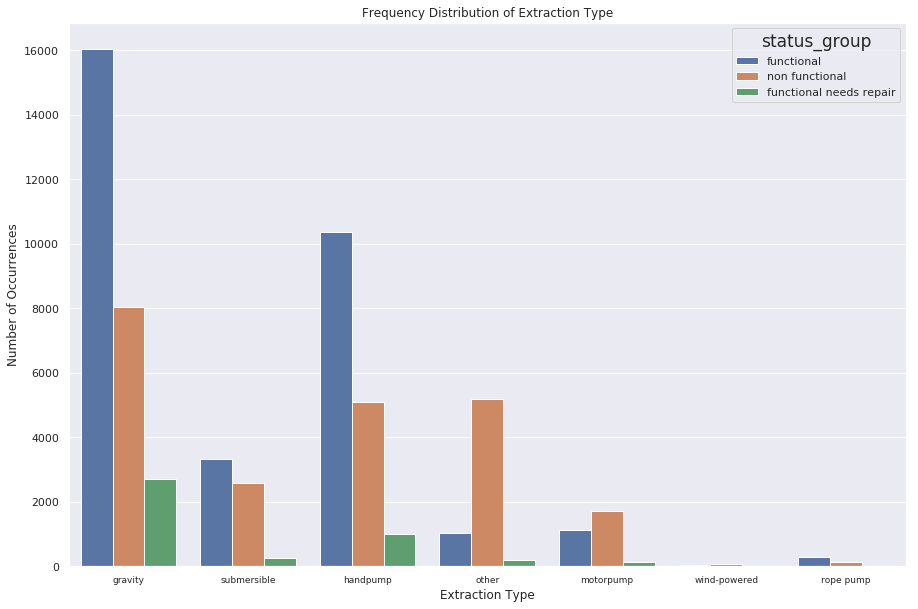

In [233]:
sns.countplot(data= dataset, x='extraction_type_class', hue='status_group')
plt.title('Frequency Distribution of Extraction Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Extraction Type', fontsize=12)

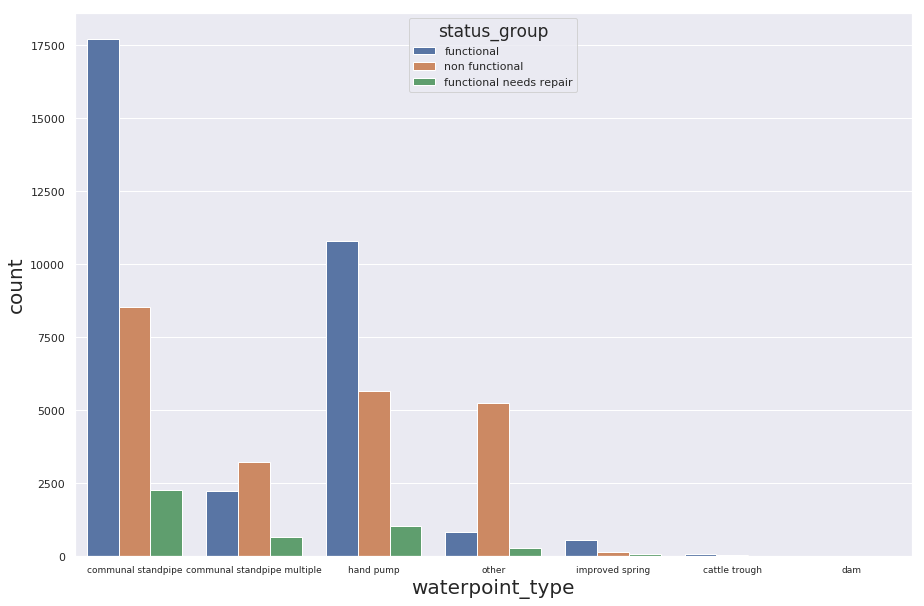

In [234]:
sns.countplot(data= dataset, x='waterpoint_type', hue='status_group')

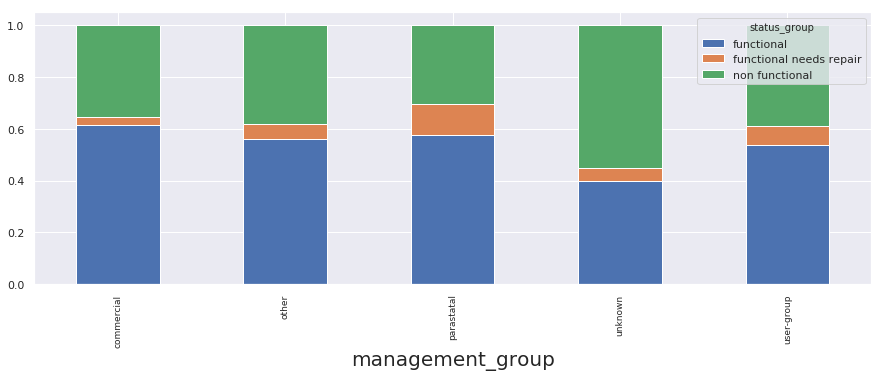

In [235]:
pd.crosstab(dataset.management_group, dataset.status_group, normalize="index").plot.bar(stacked=True, figsize=(15,5))

Text(0.5, 0, 'Constrcution Year')

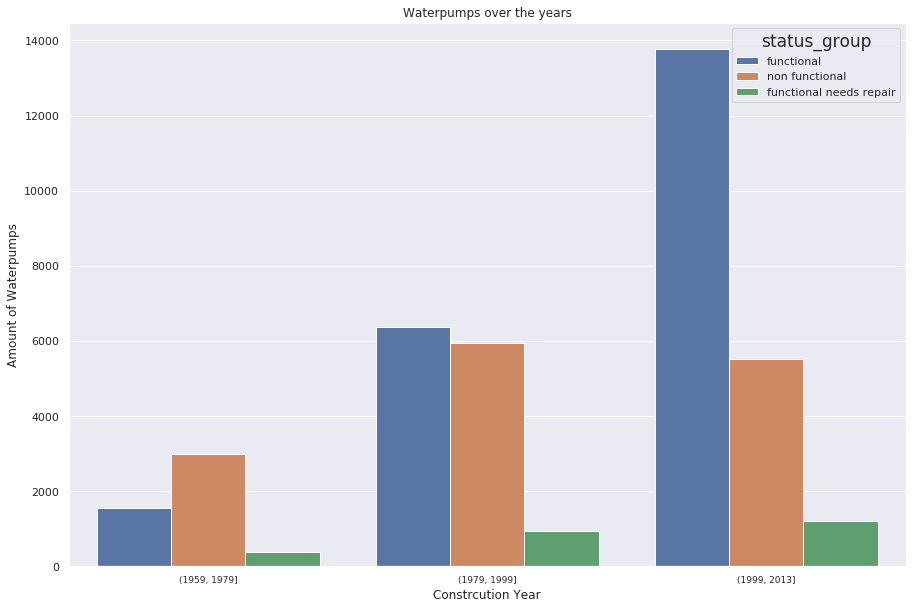

In [236]:
bin_construction = [1959,1979,1999,2013]
category = pd.cut(dataset['construction_year'],bin_construction)
dataset['construction_year'] = category
sns.countplot(data= dataset, x='construction_year', hue='status_group')
plt.title('Waterpumps over the years')
plt.ylabel('Amount of Waterpumps', fontsize=12)
plt.xlabel('Constrcution Year', fontsize=12)

#with sns.axes_style('white'):
 #   g = sns.factorplot("construction_year", data= category, aspect=2,
  #                     kind="count", color='steelblue')
   # g.set_xticklabels(step=10)


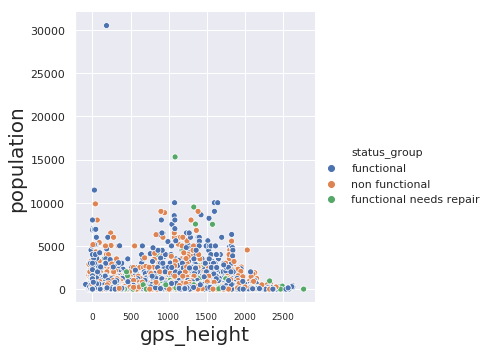

In [228]:
sns.relplot(data= dataset, x='gps_height',y ='population', hue='status_group')

Text(0.5, 0, 'Elevation')

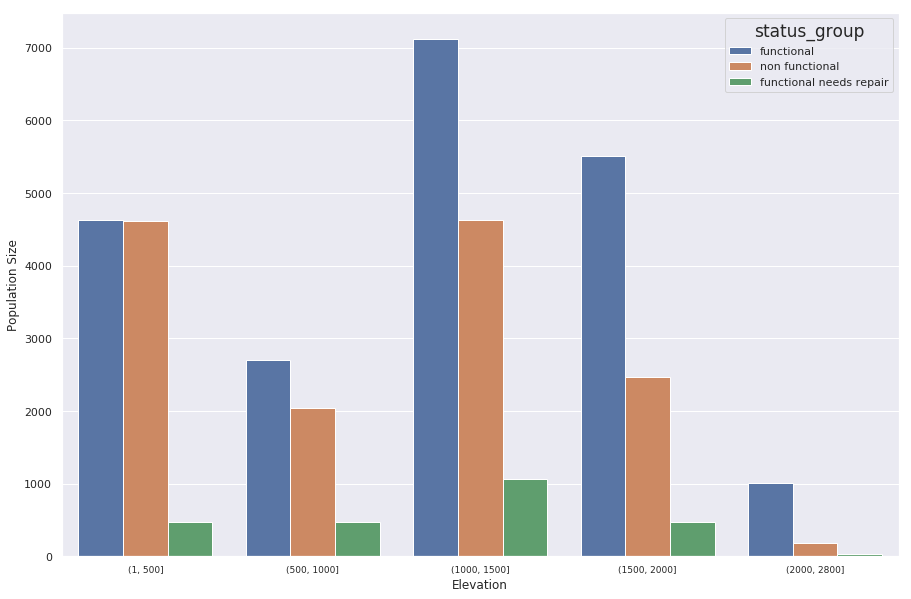

In [237]:
bin_construction = [1,500,1000,1500,2000,2800]
category = pd.cut(dataset['gps_height'],bin_construction)
dataset['gps_height'] = category
sns.countplot(data= dataset, x='gps_height', hue ='status_group')
plt.title('')
plt.ylabel('Population Size', fontsize=12)
plt.xlabel('Elevation', fontsize=12)

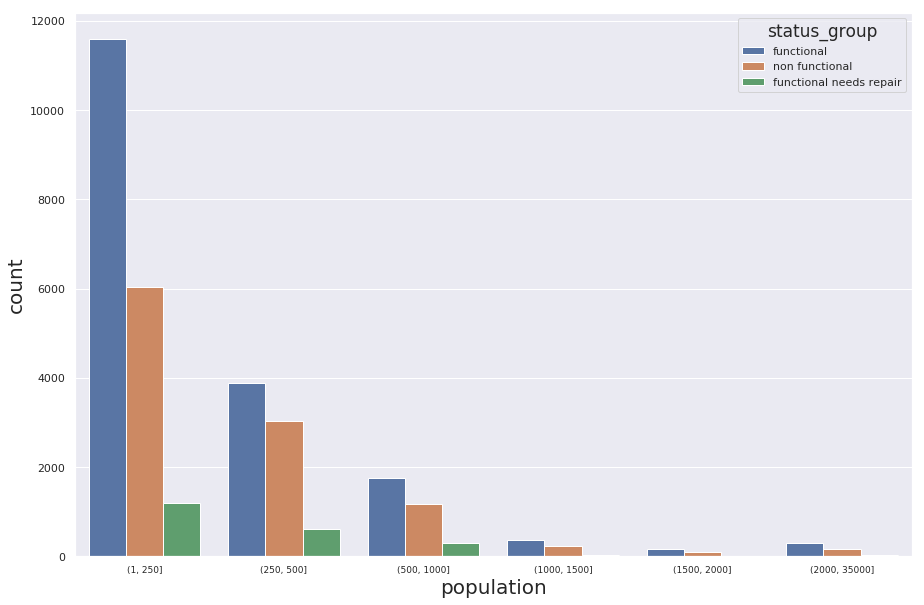

In [238]:
bin_construction = [1,250,500,1000,1500,2000,35000]
category = pd.cut(dataset['population'],bin_construction)
dataset['population'] = category
sns.countplot(data= dataset, x='population', hue='status_group')

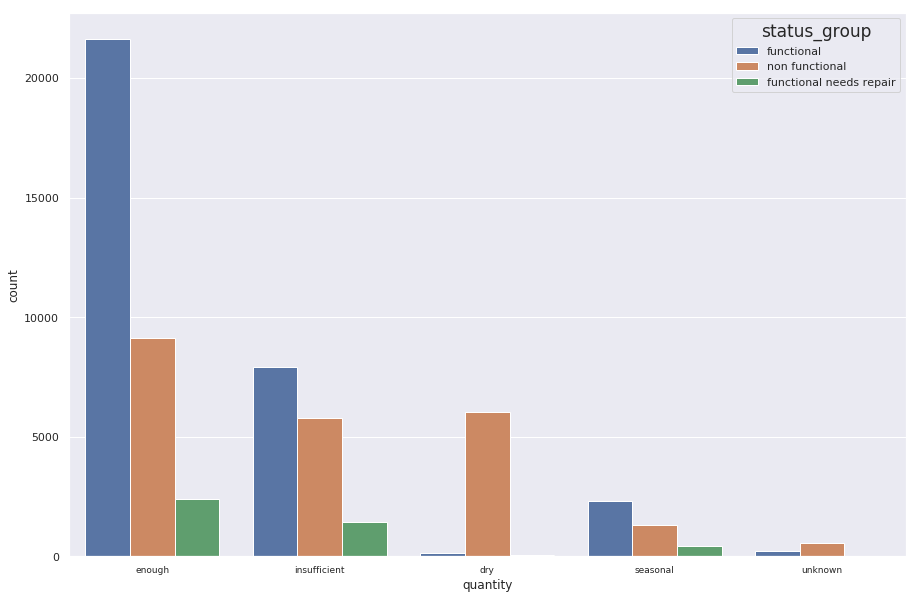

In [262]:
sns.countplot(data= dataset, x='quantity', hue='status_group')

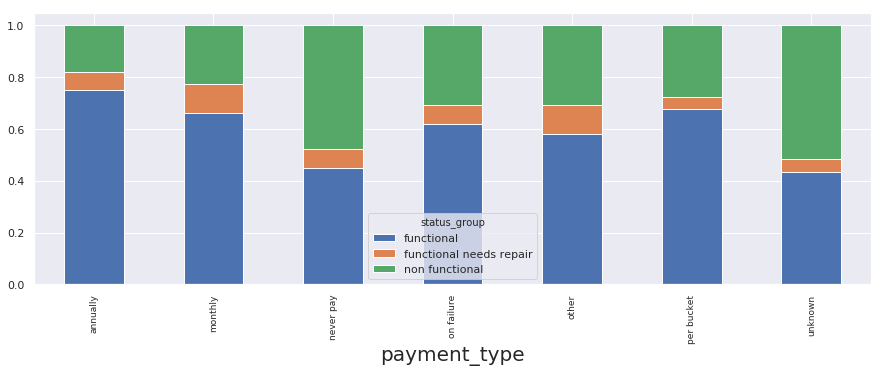

In [240]:
pd.crosstab(dataset.payment_type, dataset.status_group, normalize="index").plot.bar(stacked=True, figsize=(15,5))

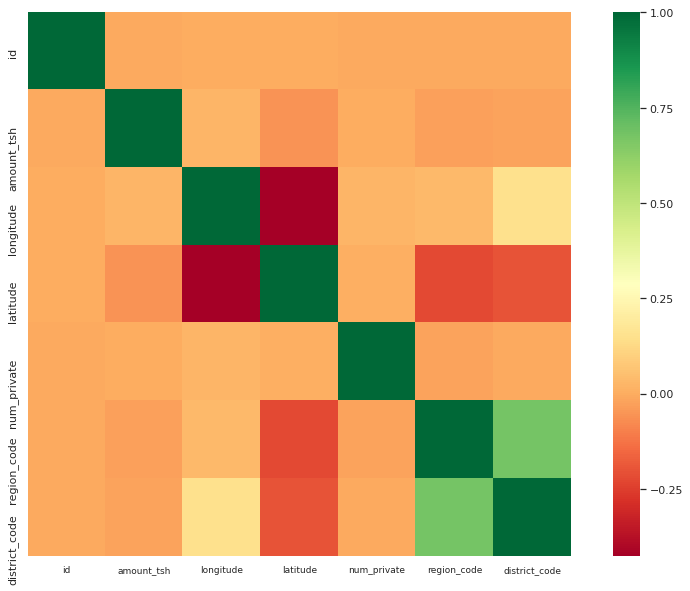

In [241]:
sns.heatmap(dataset.corr(), square=True, cmap='RdYlGn')

In [242]:
def status_group_to_numeric(x):
    if x=='functional':
        return 1
    if x=='functional needs repair':
        return 0
    if x=='non functional':
        return -1

In [243]:
dataset['status_group_num'] = dataset['status_group'].apply(status_group_to_numeric)
dataset.head()


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group_num
0,69572,functional,6000.0,2011-03-14,Roman,"(1000.0, 1500.0]",Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
1,8776,functional,0.0,2013-03-06,Grumeti,"(1000.0, 1500.0]",GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1
2,34310,functional,25.0,2013-02-25,Lottery Club,"(500.0, 1000.0]",World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1
3,67743,non functional,0.0,2013-01-28,Unicef,"(1.0, 500.0]",UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,-1
4,19728,functional,0.0,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1


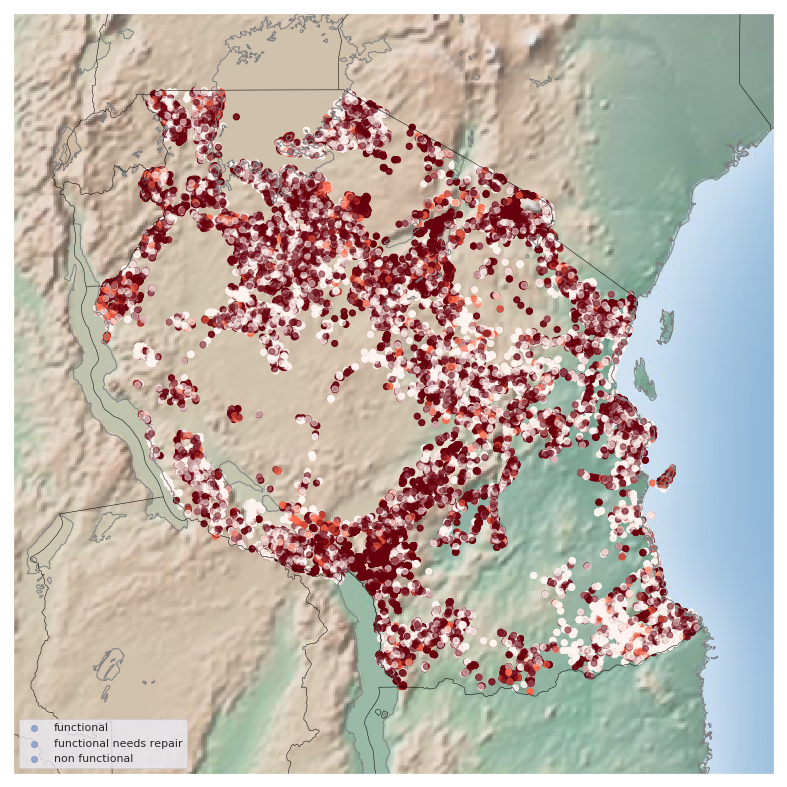

In [254]:
lon = dataset['longitude'].values
lat = dataset['latitude'].values
sg = dataset['status_group_num'].values
# 1. Draw the map background
fig = plt.figure(figsize=(14, 14))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=-6.3728, lon_0=34.8925,
            width=1.5E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black')
m.drawstates(color='gray')
#groups = ['functional','functional needs repair','non functional']

# 2. scatter data
for a in ['functional','functional needs repair','non functional']:
    m.scatter(lon,lat, latlon=True, alpha=0.5, c = sg, cmap = 'Reds', label = str(a)) 
    
plt.legend(loc = 'lower left')
# 3. create legend
#for a in ['functional','functional needs repair','non functional']:


In [261]:
display(dataset.groupby('status_group').size())

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64